![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

## Lecture 1 Support Notebook

### Table of Contents
<p>
<div class="lev1">
    <a href="#RL-Example">
        <span class="toc-item-num">0.&nbsp;&nbsp;</span>
        RL-Example
    </a>
</div>
<div class="lev1">
    <a href="#Markov-Chain-I">
        <span class="toc-item-num">1.1&nbsp;&nbsp;</span>
        Markov Chain I
    </a>
</div>
<div class="lev1">
    <a href="#Markov-Chain-II"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>
        Markov Chain II
    </a>
</div>
<div class="lev1">
    <a href="#Markov-Chain-III"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>
        Markov Chain III
    </a>
</div>
<div class="lev1">
    <a href="#Bellman-Equation"><span class="toc-item-num">2&nbsp;&nbsp;</span>
        Bellman Equation
    </a>
</div>
<div class="lev1">
    <a href="#Value-Iteration"><span class="toc-item-num">3&nbsp;&nbsp;</span>
        Value Iteration
    </a>
</div>
<div class="lev1">
    <a href="#Policy-Iteration-I"><span class="toc-item-num">4&nbsp;&nbsp;</span>
        Policy Iteration I
    </a>
</div>
<div class="lev1">
    <a href="#Policy-Iteration-II"><span class="toc-item-num">5&nbsp;&nbsp;</span>
        Policy Iteration II
    </a>
</div>

In [1]:
#!/usr/bin/env python

#MIT License
#Copyright (c) 2017 Massimiliano Patacchiola
#
#Permission is hereby granted, free of charge, to any person obtaining a copy
#of this software and associated documentation files (the "Software"), to deal
#in the Software without restriction, including without limitation the rights
#to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
#copies of the Software, and to permit persons to whom the Software is
#furnished to do so, subject to the following conditions:
#
#The above copyright notice and this permission notice shall be included in all
#copies or substantial portions of the Software.
#
#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
#IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
#FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
#AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
#LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
#OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
#SOFTWARE.

# Markov Chain I

In [2]:
# INSTALL THIS PACKAGE THE FIRST TIME YOU RUN THIS INSTANCE
!pip install tqdm

     |████████████████████████████████| 76 kB 913 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [4]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
#%pylab inline
import random
%matplotlib inline

In [5]:
#Declaring the Transition Matrix T
T = np.array([[0.90, 0.10],
              [0.50, 0.50]])
T = pd.DataFrame(data=T)
T.columns=["T", "0"]
T.style.hide_index()

T,0
0.900000,0.100000
0.500000,0.500000


In [6]:
#Obtaining T after 3 steps
T_3 = np.linalg.matrix_power(T, 3)
T_3 = pd.DataFrame(data=T_3)
T_3.columns=["T", "3"]
T_3.style.hide_index()

T,3
0.844000,0.156000
0.780000,0.220000


In [7]:
#Obtaining T after 50 steps
T_50 = np.linalg.matrix_power(T, 50)
T_50 = pd.DataFrame(data=T_50)
T_50.columns=["T", "50"]
T_50.style.hide_index()

T,50
0.833333,0.166667
0.833333,0.166667


In [7]:
#Obtaining T after 100 steps
T_100 = np.linalg.matrix_power(T, 100)
T_100 = pd.DataFrame(data=T_100)
T_100.columns=["T", "100"]
T_100.style.hide_index()

T,100
0.833333,0.166667
0.833333,0.166667


T,100
0.833333,0.166667
0.833333,0.166667


## (End of Example.  Instructor Return to Slides)

# Markov Chain II

In [8]:
#Declaring the initial distribution
v = np.array([[1.0, 0.0]])

#Obtaining T after 3 steps
T_3 = np.linalg.matrix_power(T, 3)
#Obtaining T after 50 steps
T_50 = np.linalg.matrix_power(T, 50)
#Obtaining T after 100 steps
T_100 = np.linalg.matrix_power(T, 100)

#Printing the initial distribution
print("v: " + str(v))
print("v_1: " + str(np.dot(v,T)))
print("v_3: " + str(np.dot(v,T_3)))
print("v_50: " + str(np.dot(v,T_50)))
print("v_100: " + str(np.dot(v,T_100)))

v: [[1. 0.]]
v_1: [[0.9 0.1]]
v_3: [[0.844 0.156]]
v_50: [[0.83333333 0.16666667]]
v_100: [[0.83333333 0.16666667]]


## (End of Example.  Instructor Return to Slides)

<div class="lev1">
    <a href="#Lecture-1-Support-Notebook">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        Go to TOP
    </a>
</div>

# Markov Chain III

In [9]:
#Declaring the initial distribution
v = np.array([[0.5, 0.5]])
#Obtaining T after 3 steps
T_3 = np.linalg.matrix_power(T, 3)
#Obtaining T after 50 steps
T_50 = np.linalg.matrix_power(T, 50)
#Obtaining T after 100 steps
T_100 = np.linalg.matrix_power(T, 100)

#Printing the initial distribution
print("v: " + str(v))
print("v_1: " + str(np.dot(v,T)))
print("v_3: " + str(np.dot(v,T_3)))
print("v_50: " + str(np.dot(v,T_50)))
print("v_100: " + str(np.dot(v,T_100)))

v: [[0.5 0.5]]
v_1: [[0.7 0.3]]
v_3: [[0.812 0.188]]
v_50: [[0.83333333 0.16666667]]
v_100: [[0.83333333 0.16666667]]


## What is happening in the long run?
This time the probability of being in $s_0$ at k=3 is lower (0.812), but in the long run we have the same outcome (0.8333333). <br/>

The result after 50 and 100 iterations are the same and v_50 is equal to v_100 no matter which starting distribution we have.

The chain converged to equilibrium meaning that as the time progresses it forgets about the starting distribution. But we have to be careful, the convergence is not always guaranteed. The dynamics of a Markov chain can be very complex, in particular it is possible to have transient and recurrent states.

## (End of Example.  Instructor Return to Slides)

<div class="lev1">
    <a href="#Lecture-1-Support-Notebook">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        Go to TOP
    </a>
</div>

# Bellman Equation

### Let's see the Bellman Equation working 
+ The world has 4x3=12 possible states. 
+ Actions are: UP = 0, LEFT = 1, DOWN = 2, RIGHT = 3
+ The starting vector contains 12 values.
+ The transition matrix is a huge 12x12x4 matrix (12 starting states, 12 next states, 4 actions) where most of the values are zeros (we can move only from one state to its neighbours). 
+ The transition matrix was generated using a script and saved as a Numpy matrix (T.npy). 
+ The function return_state_utility() is an implementation of the Bellman equation. Using this function we are going to print the utility of the state (1,1) and check if it is the same we found previously.

In [10]:
def return_state_utility(v, T, u, reward, gamma):
    """Return the utility of a single state.
    This is an implementation of the Bellman equation.

    @param v the state vector
    @param T transition matrix
    @param u utility vector
    @param reward for that state
    @param gamma discount factor
    @return the utility of the state
    """
    action_array = np.zeros(4)
    
    for action in range(0, 4):
        action_array[action] = np.sum(np.multiply(u, np.dot(v, T[:,:,action])))
    return reward + gamma * np.max(action_array)

In [11]:
def main():
    #Starting state vector
    #The agent starts from (1, 1)
    v = np.array([[0.0, 0.0, 0.0, 0.0, 
                   0.0, 0.0, 0.0, 0.0, 
                   1.0, 0.0, 0.0, 0.0]])

    #Transition matrix loaded from file
    #(It is too big to write here)
    T = np.load("T.npy")
    
    #Utility vector
    u = np.array([[0.812, 0.868, 0.918,   1.0,
                   0.762,   0.0, 0.660,  -1.0,
                   0.705, 0.655, 0.611, 0.388]])

    #Defining the reward for state (1,1)
    reward = -0.04
    #Assuming that the discount factor is equal to 1.0
    gamma = 1.0

    #Use the Bellman equation to find the utility of state (1,1)
    utility_11 = return_state_utility(v, T, u, reward, gamma)
    print("Utility of state (1,1): " + str(utility_11))

if __name__ == "__main__":
    main()

Utility of state (1,1): 0.7056


In [29]:
np.dot(v, T[:,:,0])

array([[0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0.1, 0.1, 0. , 0. ]])

## (End of Example.  Instructor Return to Slides)

<div class="lev1">
    <a href="#Lecture-1-Support-Notebook">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        Go to TOP
    </a>
</div>

# Value Iteration
Reusing the return_state_utility() function to update the utility vector

It is interesting to give a look at the stabilization of each utility during the convergence. Using matplotlib I draw the utility value of each state for 25 iterations

In [30]:
#Implementation of the Value Iteration algorithm

def generate_graph(utility_list):
    """Given a list of utility arrays (one for each iteration)
       it generates a matplotlib graph and save it as 'output.jpg'
    """
    name_list = ('(1,3)', '(2,3)', '(3,3)', '+1', '(1,2)', '#', '(3,2)', '-1', '(1,1)', '(2,1)', '(3,1)', '(4,1)')
    color_list = ('cyan', 'teal', 'blue', 'green', 'magenta', 'black', 'yellow', 'red', 'brown', 'pink', 'gray', 'sienna')
    counter = 0
    index_vector = np.arange(len(utility_list))
    for state in range(12):
        state_list = list()
        for utility_array in utility_list:
             state_list.append(utility_array[state])
        plt.plot(index_vector, state_list, color=color_list[state], label=name_list[state])  
        counter += 1
    #Adjust the legend and the axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.4), ncol=3, fancybox=True, shadow=True)
    plt.ylim((-1.1, +1.1))
    plt.xlim((1, len(utility_list)-1))
    plt.ylabel('Utility', fontsize=15)
    plt.xlabel('Iterations', fontsize=15)
    plt.show()
#     plt.savefig("./output.jpg", dpi=500)

In [37]:
len(graph_list), graph_list[1].shape

(26, (12,))

=================== FINAL RESULT ==================
Iterations: 26
Delta: 9.511968687869743e-06
Gamma: 0.999
Epsilon: 0.01
[0.80796341 0.86539911 0.91653199 1.        ]
[ 0.75696613  0.          0.65836281 -1.        ]
[0.69968168 0.64881721 0.60471137 0.3814863 ]


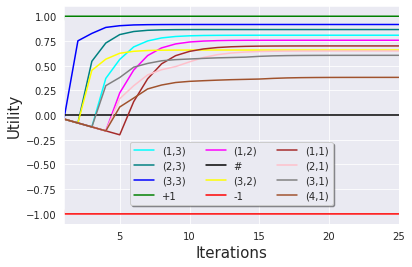

In [32]:

#Change as you want
tot_states = 12
gamma = 0.999 #Discount factor
iteration = 0 #Iteration counter
epsilon = 0.01 #Stopping criteria small value

#List containing the data for each iteation
graph_list = list()

#Transition matrix loaded from file (It is too big to write here)
T = np.load("T.npy")

#Reward vector
r = np.array([-0.04, -0.04, -0.04,  +1.0,
              -0.04,   0.0, -0.04,  -1.0,
              -0.04, -0.04, -0.04, -0.04])    

#Utility vectors
u = np.array([0.0, 0.0, 0.0,  0.0,
               0.0, 0.0, 0.0,  0.0,
               0.0, 0.0, 0.0,  0.0])
u1 = np.array([0.0, 0.0, 0.0,  0.0,
                0.0, 0.0, 0.0,  0.0,
                0.0, 0.0, 0.0,  0.0])

while True:
    delta = 0
    u = u1.copy()
    iteration += 1
    graph_list.append(u)
    for s in range(tot_states):
        reward = r[s]
        v = np.zeros((1,tot_states))
        v[0,s] = 1.0
        u1[s] = return_state_utility(v, T, u, reward, gamma)
        delta = max(delta, np.abs(u1[s] - u[s]))
    #Stopping criteria
    if delta < epsilon * (1 - gamma) / gamma:
            print("=================== FINAL RESULT ==================")
            print("Iterations: " + str(iteration))
            print("Delta: " + str(delta))
            print("Gamma: " + str(gamma))
            print("Epsilon: " + str(epsilon))
            print("===================================================")
            print(u[0:4])
            print(u[4:8])
            print(u[8:12])
            print("===================================================")
            break

generate_graph(graph_list)


Using the same code I run different simulations with different values for the discounting factor gamma. When the discounting factor approaches 1.0 our prediction for the utilities gets more precise. In the limit case of gamma = 1.0 the algorithm will never end because we will never reach the stopping criteria.

=================== FINAL RESULT ==================
Iterations: 7
Delta: 0.0035943600000000048
Gamma: 0.5
Epsilon: 0.01
[0.0074148  0.125316   0.38238918 1.        ]
[-0.0436268   0.          0.06615218 -1.        ]
[-0.0671452 -0.0548572 -0.020434  -0.0749276]


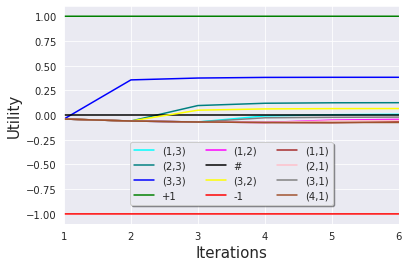

In [42]:
def main():
    #Change as you want
    tot_states = 12
    gamma = 0.5 #Discount factor
    iteration = 0 #Iteration counter
    epsilon = 0.01 #Stopping criteria small value

    #List containing the data for each iteation
    graph_list = list()

    #Transition matrix loaded from file (It is too big to write here)
    T = np.load("T.npy")

    #Reward vector
    r = np.array([-0.04, -0.04, -0.04,  +1.0,
                  -0.04,   0.0, -0.04,  -1.0,
                  -0.04, -0.04, -0.04, -0.04])    

    #Utility vectors
    u = np.array([0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0])
    u1 = np.array([0.0, 0.0, 0.0,  0.0,
                    0.0, 0.0, 0.0,  0.0,
                    0.0, 0.0, 0.0,  0.0])

    while iteration<100:
        delta = 0
        u = u1.copy()
        iteration += 1
        graph_list.append(u)
        for s in range(tot_states):
            reward = r[s]
            v = np.zeros((1,tot_states))
            v[0,s] = 1.0
            u1[s] = return_state_utility(v, T, u, reward, gamma)
            delta = max(delta, np.abs(u1[s] - u[s]))
        #Stopping criteria
        if delta < epsilon * (1 - gamma) / gamma:
                print("=================== FINAL RESULT ==================")
                print("Iterations: " + str(iteration))
                print("Delta: " + str(delta))
                print("Gamma: " + str(gamma))
                print("Epsilon: " + str(epsilon))
                print("===================================================")
                print(u[0:4])
                print(u[4:8])
                print(u[8:12])
                print("===================================================")
                break

    generate_graph(graph_list)

if __name__ == "__main__":
    main()

=================== FINAL RESULT ==================
Iterations: 14
Delta: 0.0006011194084739047
Gamma: 0.9
Epsilon: 0.01
[0.50928546 0.64958065 0.79536094 1.        ]
[ 0.39810204  0.          0.48643676 -1.        ]
[0.29543541 0.25348746 0.34461306 0.12958868]


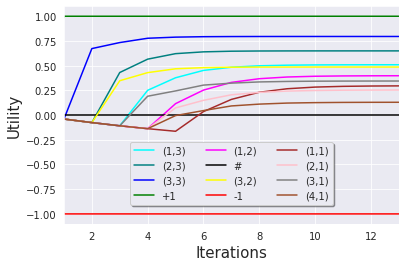

In [41]:
def main():
    #Change as you want
    tot_states = 12
    gamma = 0.9 #Discount factor
    iteration = 0 #Iteration counter
    epsilon = 0.01 #Stopping criteria small value

    #List containing the data for each iteation
    graph_list = list()

    #Transition matrix loaded from file (It is too big to write here)
    T = np.load("T.npy")

    #Reward vector
    r = np.array([-0.04, -0.04, -0.04,  +1.0,
                  -0.04,   0.0, -0.04,  -1.0,
                  -0.04, -0.04, -0.04, -0.04])    

    #Utility vectors
    u = np.array([0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0])
    u1 = np.array([0.0, 0.0, 0.0,  0.0,
                    0.0, 0.0, 0.0,  0.0,
                    0.0, 0.0, 0.0,  0.0])

    while True:
        delta = 0
        u = u1.copy()
        iteration += 1
        graph_list.append(u)
        for s in range(tot_states):
            reward = r[s]
            v = np.zeros((1,tot_states))
            v[0,s] = 1.0
            u1[s] = return_state_utility(v, T, u, reward, gamma)
            delta = max(delta, np.abs(u1[s] - u[s]))
        #Stopping criteria
        if delta < epsilon * (1 - gamma) / gamma:
                print("=================== FINAL RESULT ==================")
                print("Iterations: " + str(iteration))
                print("Delta: " + str(delta))
                print("Gamma: " + str(gamma))
                print("Epsilon: " + str(epsilon))
                print("===================================================")
                print(u[0:4])
                print(u[4:8])
                print(u[8:12])
                print("===================================================")
                break

    generate_graph(graph_list)

if __name__ == "__main__":
    main()

## (End of Example.  Instructor Return to Slides)

<div class="lev1">
    <a href="#Lecture-1-Support-Notebook">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        Go to TOP
    </a>
</div>

# RL Example

In [16]:
# INSTALL THIS PACKAGE THE FIRST TIME YOU RUN THIS INSTANCE
!pip install tqdm

In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
#%pylab inline
import random
%matplotlib inline

# Policy Iteration I
Once we evaluate the policy we can improve it. 
The policy improvement is the second and last step of the algorithm. <br/>
Our environment has a finite number of states and then a finite number of policies. Each iteration yields to a better policy. <br/>
The function **return_policy_evaluation()** below contains the simplified version of the Bellman equation. 
We also need the function **return_expected_action()**, which returns the action with the highest value based on the current value of $v$ and $T$. <br/>
We also have a printing function, that map each action contained in the policy vector $p$ to a symbol and print it on terminal.

In [2]:
def return_policy_evaluation(p, u, r, T, gamma):
    """
        Implements the simplified version of the Bellman Equation
    """
    for s in range(12):
        if not np.isnan(p[s]):
            v = np.zeros((1,12))
            v[0,s] = 1.0
            action = int(p[s])
            u[s] = r[s] + gamma * np.sum(np.multiply(u, np.dot(v, T[:,:,action])))
    return u

In [3]:
def return_expected_action(u, T, v):
    """Return the expected action.
    It returns an action based on the
    expected utility of doing a in state s, 
    according to T and u. This action is
    the one that maximize the expected
    utility.
    @param u utility vector
    @param T transition matrix
    @param v starting vector
    @return expected action (int)
    """
    actions_array = np.zeros(4)
    for action in range(4):
        #Expected utility of doing a in state s, according to T and u.
        actions_array[action] = np.sum(np.multiply(u, np.dot(v, T[:,:,action])))
    return np.argmax(actions_array)

In [4]:
# Nan=Nothing, -1=Terminal, 0=Up, 1=Left, 2=Down, 3=Right
def to_label_vector(vals):
    vec = []
    for v in vals:
        label = ''
        if v == -1:
            label = 'T'
        if v == 0:
            label = '^'
        if v == 1:
            label = '<'
        if v == 2:
            label = 'v'
        if v == 3:
            label = '>'
        if v == 4:
            label = '#'
        vec.append(label)
    return np.array(vec)

In [5]:
def print_policy(p, iteration, shape):
    """Print the policy on the terminal
    Using the symbol:
    * Terminal state
    ^ Up
    > Right
    v Down
    < Left
    # Obstacle
    """
    labels = to_label_vector(p)
    reshaped_grid = p.reshape(3, 4)
    reshaped_labels = labels.reshape(3, 4)
        
    _, ax = plt.subplots(figsize=(shape[0],shape[1]))
    sns.heatmap(reshaped_grid,
                    cmap=['white'],
                    cbar=False, xticklabels=False, yticklabels=False,
                    linecolor='black',
                    linewidths=1,
                    annot=reshaped_labels,
                    fmt='',
                    annot_kws={"size": 20},
                    ax=ax)
    ax.set_title('Iteration' + str(iteration))
    
    


Now I am going to use these functions in a main loop which is an implementation of the policy iteration algorithm. <br/>
+ Vector $p$ contains the actions for each state.
+ The stopping condition of the algorithm is the difference between the **state-value** vectors of two consecutive iterations. 
+ The algorithm terminates when the improvement step yields no change (or a very small change) in the state-values.

In [63]:
def main_iterative():
    """Finding the solution using the iterative approach
    """
    gamma = 0.999
    iteration = 0
    T = np.load("T.npy")

    #Generate the first policy randomly
    # Nan=Nothing, -1=Terminal, 0=Up, 1=Left, 2=Down, 3=Right
    p = np.random.randint(0, 4, size=(12)).astype(np.float32)
    p[5] = np.NaN
    p[3] = p[7] = -1

    #Utility vectors
    u = np.array([0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0])

    #Reward vector
    r = np.array([-0.04, -0.04, -0.04,  +1.0,
                  -0.04,   0.0, -0.04,  -1.0,
                  -0.04, -0.04, -0.04, -0.04])

    while True:
        iteration += 1
        epsilon = 0.0001
        #1- Policy evaluation
        u1 = u.copy()
        u = return_policy_evaluation(p, u, r, T, gamma)
        #Stopping criteria
        delta = np.absolute(u - u1).max()
        if delta < epsilon * (1 - gamma) / gamma: break
        for s in range(12):
            if not np.isnan(p[s]) and not p[s]==-1:
                v = np.zeros((1,12))
                v[0,s] = 1.0
                #2- Policy improvement
                a = return_expected_action(u, T, v)         
                if a != p[s]: p[s] = a
        
        print_policy(p,iteration, shape=(3,4))

    print("=================== FINAL RESULT ==================")
    print("Iterations: " + str(iteration))
    print("Delta: " + str(delta))
    print("Gamma: " + str(gamma))
    print("Epsilon: " + str(epsilon))
    print("===================================================")
    #print(u[0:4])
    #print(u[4:8])
    #print(u[8:12])
    #print("===================================================")
    #print_policy(p, shape=(3,4))
    print("===================================================")

    u = u.reshape(3, 4)
    df_u = pd.DataFrame(data=u)
    #df_u.columns=["T", "0", " ", " "]
    #df_u.style.hide_index()
    print(df_u)
    plt.close()

Running the script with gamma=0.999 and epsilon=0.0001, we get convergence in 22 iterations with the following result:

=================== FINAL RESULT ==================
Iterations: 22
Delta: 9.04321849071188e-08
Gamma: 0.999
Epsilon: 0.0001
          0         1         2         3
0  0.807963  0.865399  0.916532  1.000000
1  0.756966  0.000000  0.658363 -1.000000
2  0.699683  0.648821  0.604720  0.381504


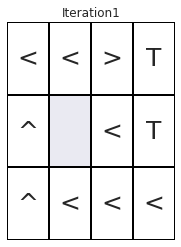

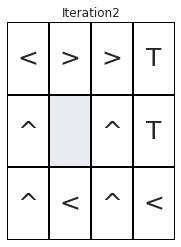

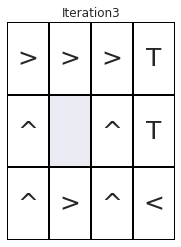

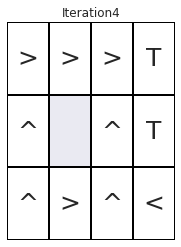

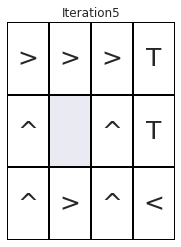

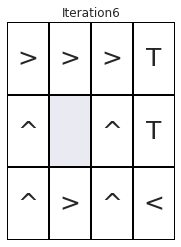

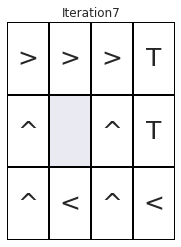

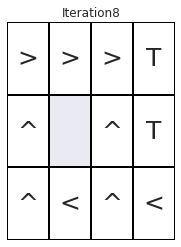

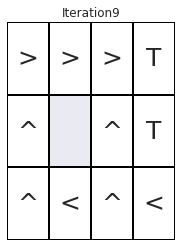

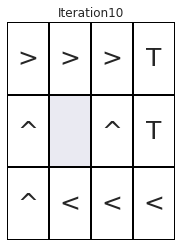

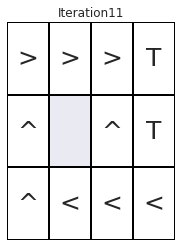

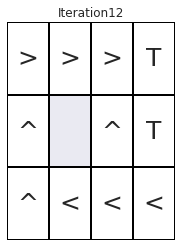

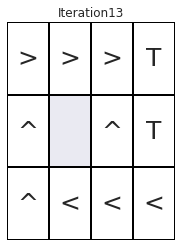

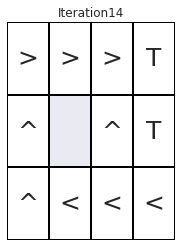

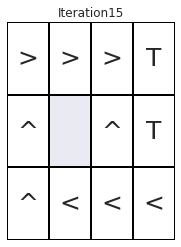

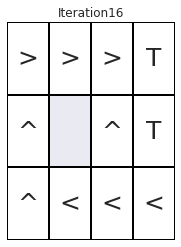

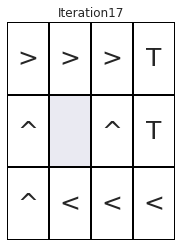

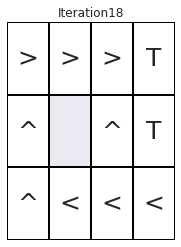

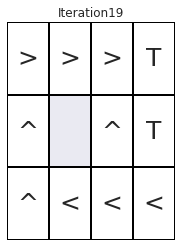

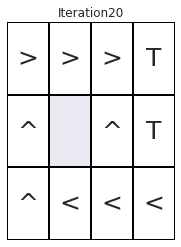

In [64]:
def main():

    main_iterative()
    #main_linalg()

if __name__ == "__main__":
    main()
    

<img src="../images/RL-lecture1-1.png" alt="Drawing" style="width: 500px;">

## Conclusion
The final policy returned by the algorithm is equal to the optimal policy.<br/>
Moreover, using the simplified Bellman equation the algorithm managed to find good values for the utility vector. <br/>
+ The policy evolution shows something interesting: 
    + At the beginning the policy is randomly generated. 
    + After four iterations the algorithm finds a sub-optimal policy and sticks to it until iteration 10 when it finds the optimal policy.
    + From iteration 10 until iteration 22 the algorithm does not change the policy at all. 

###### A sub-optimal policy can be a problem in model-free reinforcement learning, because **greedy agents** can stick to it, for the moment it is not a problem for us. We will learn more about greedy agents on a further lecture!

## (End of Example.  Instructor Return to Slides)

<div class="lev1">
    <a href="#Lecture-1-Support-Notebook">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        Go to TOP
    </a>
</div>

# Policy Iteration II
Implementation of the iterative policy evaluation and update showing how the deltas for each state decay to 0 as we reach convergence.

### Parameters

In [35]:
gamma = 1 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 1000

In [36]:
def actionRewardFunction(initialPosition, action):
    
    if initialPosition in terminationStates:
        return initialPosition, 0
    
    reward = rewardSize
    finalPosition = np.array(initialPosition) + np.array(action)
    if -1 in finalPosition or 4 in finalPosition: 
        finalPosition = initialPosition
        
    return finalPosition, reward

### Initialization

In [37]:
valueMap = np.zeros((gridSize, gridSize))
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

# values of the value function at step 0
valueMap

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Policy evaluation
Notice that we can repeat this process over and over in which we “sweep” and update the state-value function for all the states. <br/>
These values can get iteratively updated until reaching convergence. <br/>
In fact in the iterative policy evaluation algorithm, you can see we calculate some delta that reflect how much the value of a state changes respect the previous value. <br/>
These deltas decay over the iterations and are supposed to reach 0 at the infinity.

In [ ]:
deltas = []
for it in range(numIterations):
    copyValueMap = np.copy(valueMap)
    deltaState = []
    for state in states:
        print(state)
        weightedRewards = 0
        for action in actions:
            finalPosition, reward = actionRewardFunction(state, action)
            print(finalPosition, reward)
            weightedRewards += (1/len(actions))*(reward+(gamma*valueMap[finalPosition[0], finalPosition[1]]))
        deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))
        copyValueMap[state[0], state[1]] = weightedRewards
    deltas.append(deltaState)
    valueMap = copyValueMap
    if it in [0,1,2,9, 99, numIterations-1]:
        print("Iteration {}".format(it+1))
        print(valueMap)
        print("")

### Delta Convergence
Observe in the end how the deltas for each state decay to 0 as we reach convergence

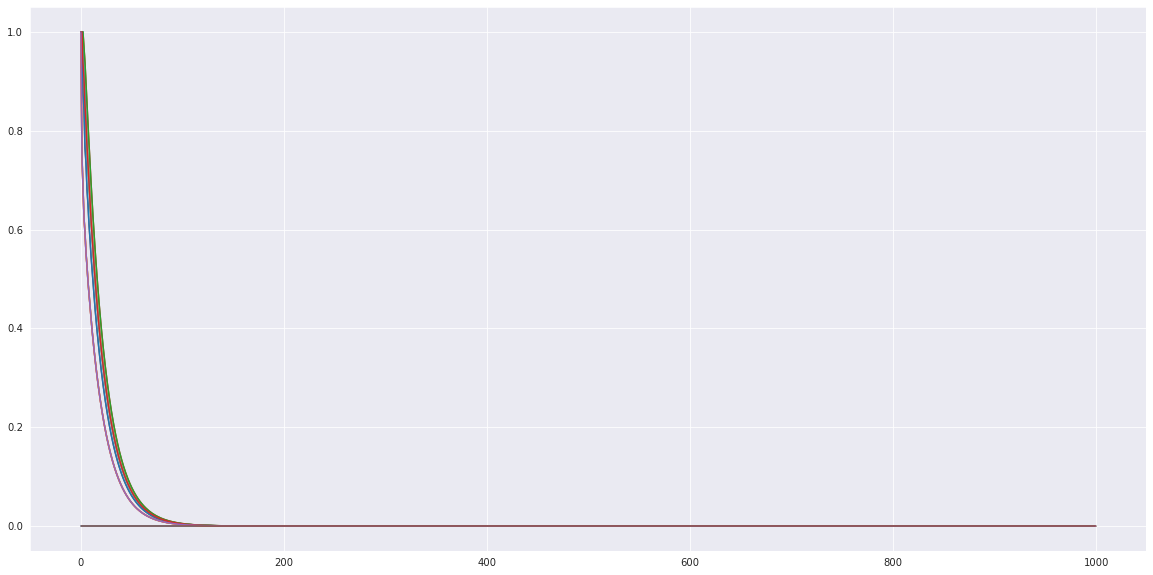

In [28]:
# TODO: legends
plt.figure(figsize=(20, 10))
plt.plot(deltas)

<div class="lev1">
    <a href="#Lecture-1-Support-Notebook">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        Go to TOP
    </a>
</div>